In [5]:
# Importing all the data sets that are needed
#for libraries
import numpy as np 
import pandas as pd 
# for visualization
import matplotlib.pyplot as plt 
import seaborn as sns 
# for train test split
from sklearn.model_selection import train_test_split 
# for scaling
from sklearn.preprocessing import StandardScaler 
# for model building
from sklearn.linear_model import LinearRegression
# for supress warnings
import warnings
warnings.filterwarnings("ignore")

In [6]:
# importing the dataset
salary_org = pd.read_csv(r'/home/divyanshu/Desktop/projects/salary prediction-20211128T142209Z-001/salary prediction/train.csv')
salary_org.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,$11310.00,$873.63
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,$53428.00,$52868.38
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,$68300.00,$67439.19
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,$62000.00,$58654.74
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,$43999.00,$39686.95


In [7]:
# data cleaning and preparation
salary_org.info()
# creating a copy of our dataset
salary_cpy = salary_org.copy()
salary_cpy.columns
# since name has leading space let's remove that
salary_cpy.columns = salary_cpy.columns.str.strip()
salary_cpy.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18981 entries, 0 to 18980
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0    Name         18981 non-null  object
 1   JobTitle      18981 non-null  object
 2   AgencyID      18981 non-null  object
 3   Agency        18981 non-null  object
 4   HireDate      18911 non-null  object
 5   AnnualSalary  18981 non-null  object
 6   GrossPay      15758 non-null  object
dtypes: object(7)
memory usage: 1.0+ MB


Index(['Name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate', 'AnnualSalary',
       'GrossPay'],
      dtype='object')

In [8]:
# checking the null values 
print(salary_cpy.isnull().sum())


Name               0
JobTitle           0
AgencyID           0
Agency             0
HireDate          70
AnnualSalary       0
GrossPay        3223
dtype: int64


In [9]:
# as hiredate has less than 1% of total values as null so we can drop it
salary_cpy = salary_cpy.dropna(subset = ['HireDate'])
print(salary_cpy.isnull().sum())

Name               0
JobTitle           0
AgencyID           0
Agency             0
HireDate           0
AnnualSalary       0
GrossPay        3223
dtype: int64


In [10]:

# now as grosspay is dependent on annual salary so these are interrelated to each other and also grosspay has null values so droping grosspay
salary_cpy = salary_cpy.drop('GrossPay',axis=1)
salary_cpy.isnull().sum()

Name            0
JobTitle        0
AgencyID        0
Agency          0
HireDate        0
AnnualSalary    0
dtype: int64

In [11]:
# lets check the value count for each columns
print(salary_cpy.AgencyID.value_counts())
print(salary_cpy.Agency.value_counts())
# we can say that a single agency seems to have different agencyid's which might be on job roles
print(salary_cpy.JobTitle.value_counts())
print(salary_cpy.Name.value_counts())
# here 1073 job title that are available

P04001    316
C90786    276
W02629    193
P04002    191
A99416    166
         ... 
W02525      1
W02400      1
A64005      1
W02666      1
W02339      1
Name: AgencyID, Length: 1177, dtype: int64
Youth Summer                4323
Police Department           3141
Fire Department             1576
DPW-Water & Waste Water     1491
HLTH-Health Department       833
                            ... 
Council Services               6
HLTH-Health Dept Locatio       6
Legislative Reference          5
M-R Cable & Comm               4
Special City Services          4
Name: Agency, Length: 65, dtype: int64
AIDE BLUE CHIP                    4817
POLICE OFFICER                    1866
LABORER (Hourly)                   597
EMT Firefighter Suppression        358
CROSSING GUARD                     337
                                  ... 
PUBLIC INFORMATION OFFICER SAO       1
STREET MASON                         1
DESIGN PLANNER I                     1
FUEL SYSTEMS SPECIALIST              1
Research An

In [12]:
# value counts on hire date
salary_cpy.HireDate.value_counts()
# more number of people are hired on 05/21/2014
# date format MM/DD/YYYY

05/21/2014    1478
06/10/2013     696
06/12/2012     541
06/07/2011     368
05/29/2014     347
              ... 
02/13/2009       1
08/12/1993       1
02/09/1998       1
05/06/1980       1
10/15/1979       1
Name: HireDate, Length: 4737, dtype: int64

In [13]:
# value counts on annual salary
salary_cpy.AnnualSalary.value_counts()
# as dollar is attached to salary let's remove it bcz it might affect the analysis

$11310.00    4811
$20800.00     325
$29245.00     196
$43999.00     169
$44773.00     162
             ... 
$58227.00       1
$41704.00       1
$44700.00       1
$43000.00       1
$900.00         1
Name: AnnualSalary, Length: 1590, dtype: int64

In [14]:
# removing $
salary_cpy['AnnualSalary']= salary_cpy['AnnualSalary'].apply(lambda x : (float)(str(x)[1:]))
salary_cpy.AnnualSalary.value_counts()

11310.0    4811
20800.0     325
29245.0     196
43999.0     169
44773.0     162
           ... 
58227.0       1
41704.0       1
44700.0       1
43000.0       1
900.0         1
Name: AnnualSalary, Length: 1590, dtype: int64

In [15]:
# let's also break date into hire year, month, day
salary_cpy['HireDay']= salary_cpy['HireDate'].apply(lambda x : (int)(str(x[3:5])))
salary_cpy["HireMonth"] = salary_cpy["HireDate"].apply(lambda x : (int)(str(x[0:2])))
salary_cpy['HireYear'] = salary_cpy["HireDate"].apply(lambda x : (int)(str(x[6:])))
salary_cpy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18911 entries, 0 to 18980
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          18911 non-null  object 
 1   JobTitle      18911 non-null  object 
 2   AgencyID      18911 non-null  object 
 3   Agency        18911 non-null  object 
 4   HireDate      18911 non-null  object 
 5   AnnualSalary  18911 non-null  float64
 6   HireDay       18911 non-null  int64  
 7   HireMonth     18911 non-null  int64  
 8   HireYear      18911 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 1.4+ MB


In [16]:
# trim spaces
salary_cpy['JobTitle']= salary_cpy['JobTitle'].apply(lambda x : str(x).strip().replace('  ',' '))
salary_cpy['AgencyID']= salary_cpy['AgencyID'].apply(lambda x : str(x).strip().replace('  ',' '))
salary_cpy['Agency']= salary_cpy['Agency'].apply(lambda x : str(x).strip().replace('  ',' '))

In [17]:
# lower to uppercase
salary_cpy['JobTitle'] = salary_cpy['JobTitle'].apply(lambda x: str(x).upper())
salary_cpy['AgencyID'] = salary_cpy['AgencyID'].apply(lambda x: str(x).upper())
salary_cpy['Agency'] = salary_cpy['Agency'].apply(lambda x: str(x).upper())

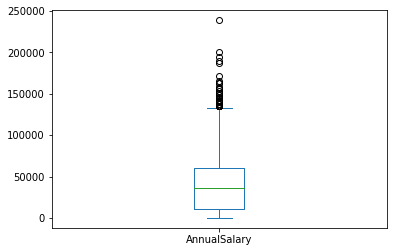

In [18]:
# outlier treatment
salary_cpy.AnnualSalary.plot.box()
plt.show()

In [19]:
# statistics summary
salary_cpy.AnnualSalary.describe()

count     18911.000000
mean      39660.421889
std       25163.465942
min           0.000000
25%       11310.000000
50%       36203.000000
75%       60300.000000
max      238772.000000
Name: AnnualSalary, dtype: float64

In [20]:
# as the max is more than the mean and median so lets cut or delete rows for annual salary>150000
salary_cpy = salary_cpy[salary_cpy['AnnualSalary']<150000]
salary_cpy.shape

(18895, 9)

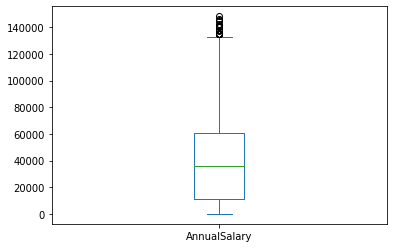

In [21]:
# creating a new boxplot for them
salary_cpy.AnnualSalary.plot.box()
plt.show()

In [22]:
salary_cpy.AnnualSalary.value_counts()
# now we done with the data preparation

11310.0     4811
20800.0      325
29245.0      196
43999.0      169
44773.0      162
            ... 
83500.0        1
40994.0        1
42846.0        1
104600.0       1
900.0          1
Name: AnnualSalary, Length: 1575, dtype: int64

In [23]:
# Exploratory data analysis

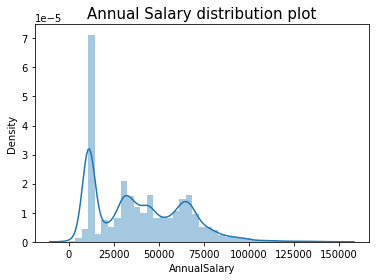

In [24]:
# so our target variable is annual salary
# let's create a distplot for it
sns.distplot(salary_cpy.AnnualSalary)
plt.title("Annual Salary distribution plot", fontsize = 15)
plt.show()
# it seems that most of people are having salary more than 10000

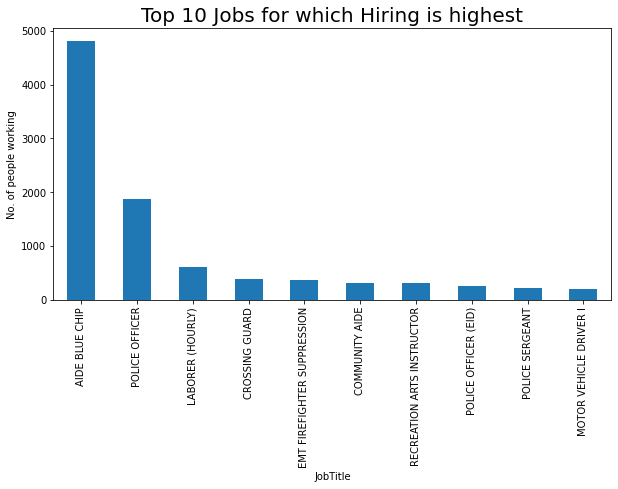

In [25]:
# let's check which jobs hired the most
plt.figure(figsize=(10,5))
salary_cpy.groupby(['JobTitle'])['Name'].count().sort_values(ascending = False).head(10).plot.bar()
plt.ylabel('No. of people working')
plt.title('Top 10 Jobs for which Hiring is highest',fontsize = 20)
plt.show()

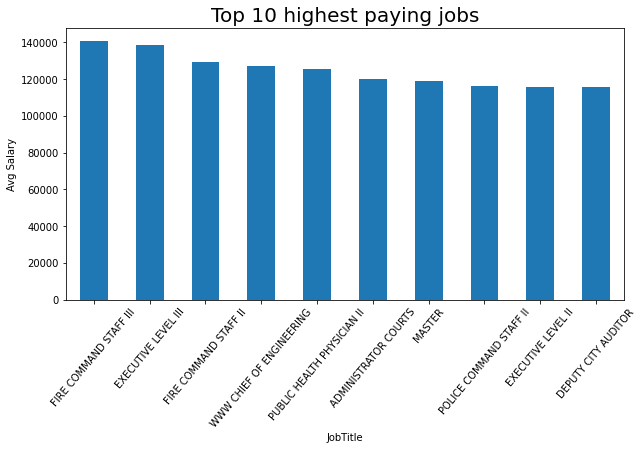

In [26]:
# let us check the top 10 jobs that fetch highest salary
plt.figure(figsize=(10,5))
salary_cpy.groupby(["JobTitle"])['AnnualSalary'].mean().sort_values(ascending = False).head(10).plot.bar()
plt.ylabel('Avg Salary')
plt.title('Top 10 highest paying jobs', fontsize = 20)
plt.xticks(rotation = 50)
plt.show()

In [27]:
# number of jobs whose average pay is more than total average salary
mean_salary= salary_cpy.AnnualSalary.mean()

good_pay_jobs = salary_cpy.groupby(['JobTitle'])['AnnualSalary'].mean().reset_index()
good_pay_jobs[good_pay_jobs.AnnualSalary>mean_salary]['JobTitle'].count()

798

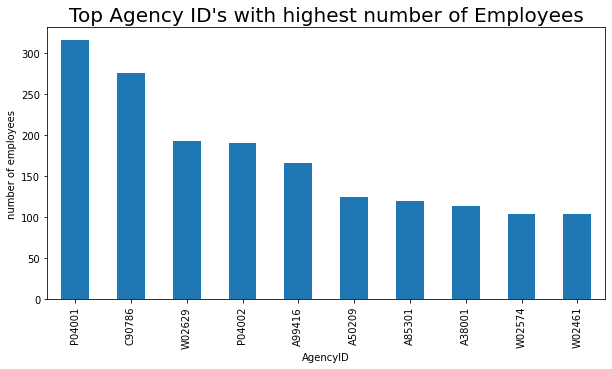

In [28]:
# let's check top agencies id with highest number of employees
plt.figure(figsize=(10,5))
salary_cpy.groupby(['AgencyID'])['Name'].count().sort_values(ascending = False).head(10).plot.bar()
plt.title("Top Agency ID's with highest number of Employees",fontsize = 20)
plt.ylabel('number of employees')
plt.show()

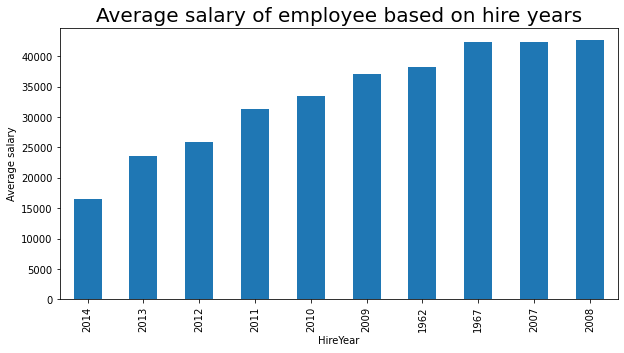

In [29]:
# let's us check people's hired in which year have the lowest salary
plt.figure(figsize=(10,5))
salary_cpy.groupby(['HireYear'])['AnnualSalary'].mean().sort_values().head(10).plot.bar()
plt.title('Average salary of employee based on hire years', fontsize = 20)
plt.ylabel('Average salary')
plt.show()

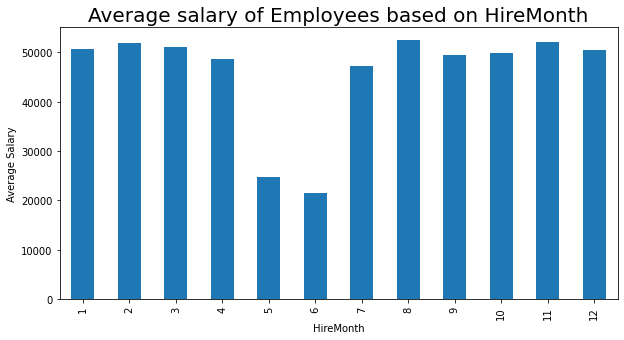

In [30]:
# checking if month hire has any such effect
plt.figure(figsize=(10,5))
salary_cpy.groupby(['HireMonth'])['AnnualSalary'].mean().plot.bar()
plt.title('Average salary of Employees based on HireMonth', fontsize = 20)
plt.ylabel('Average Salary')
plt.show()

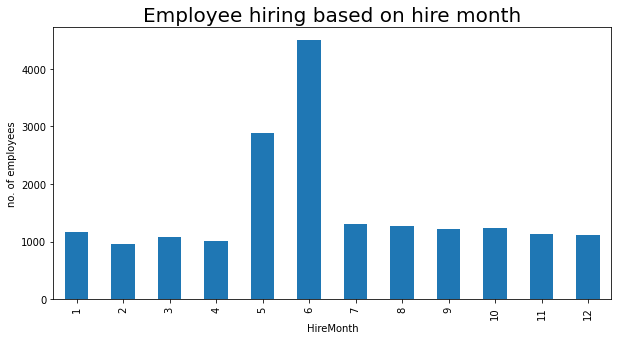

In [31]:
# let's check in which month people are hired most
plt.figure(figsize=(10,5))
salary_cpy.groupby(['HireMonth'])['Name'].count().plot.bar()
plt.title('Employee hiring based on hire month', fontsize = 20)
plt.ylabel('no. of employees')
plt.show()

<Figure size 1080x1440 with 0 Axes>

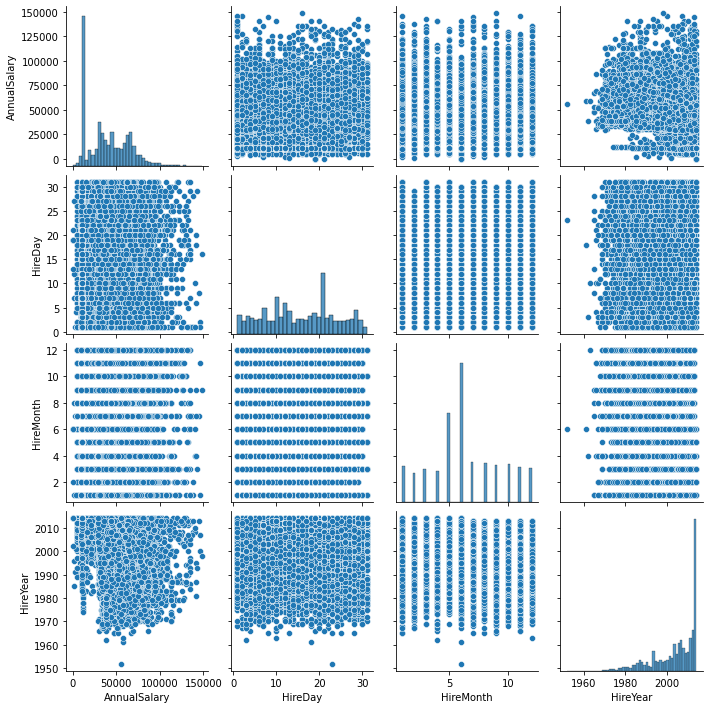

In [32]:
# lets check is there any corelation b/w any of numerical variables 
plt.figure(figsize=(15,20))
sns.pairplot(salary_cpy)
plt.show()

<AxesSubplot:>

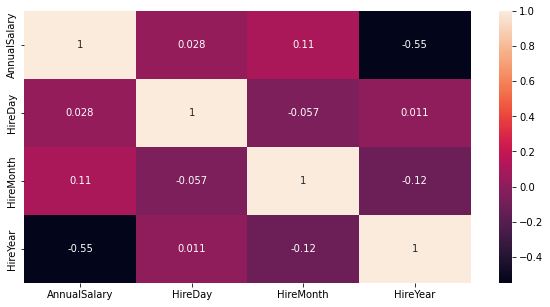

In [33]:
# let's visualize correlation using heatmaps
plt.figure(figsize=(10,5))
sns.heatmap(salary_cpy.corr(),annot = True)

In [34]:
# we have done with EDA

In [35]:
# Feature Engineering

In [36]:
# lets create a copy of the data frame todo model building
salary_master = salary_cpy.copy()
salary_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18895 entries, 0 to 18980
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          18895 non-null  object 
 1   JobTitle      18895 non-null  object 
 2   AgencyID      18895 non-null  object 
 3   Agency        18895 non-null  object 
 4   HireDate      18895 non-null  object 
 5   AnnualSalary  18895 non-null  float64
 6   HireDay       18895 non-null  int64  
 7   HireMonth     18895 non-null  int64  
 8   HireYear      18895 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 1.9+ MB


In [37]:
# applying mean encoding for job title
mean_Job = salary_master.groupby('JobTitle')['AnnualSalary'].mean()
print(mean_Job)
salary_master['JobTitle'] = salary_master['JobTitle'].map(mean_Job)
print(salary_master['JobTitle'])

JobTitle
911 LEAD OPERATOR              47886.000000
911 OPERATOR                   42835.743590
911 OPERATOR SUPERVISOR        54797.500000
ACCOUNT EXECUTIVE              42960.000000
ACCOUNTANT I                   46316.642857
                                   ...     
ZONING ADMINISTRATOR           82100.000000
ZONING APPEALS ADVISOR BMZA    59274.000000
ZONING ENFORCEMENT OFFICER     62000.000000
ZONING EXAMINER I              43674.000000
ZONING EXAMINER II             53568.000000
Name: AnnualSalary, Length: 1055, dtype: float64
0        11313.967200
1        47443.500000
2        69750.666667
3        57940.000000
4        44531.160494
             ...     
18976    11313.967200
18977    11313.967200
18978    44531.160494
18979    60588.139335
18980    53368.428571
Name: JobTitle, Length: 18895, dtype: float64


In [38]:
# apply mean encoding for Agency
mean_Agency = salary_master.groupby('Agency')['AnnualSalary'].mean()
print(mean_Agency)
salary_master['Agency']= salary_master['Agency'].map(mean_Agency)
print(salary_master['Agency'])

Agency
CIRCUIT COURT                56210.485214
CITY COUNCIL                 48774.663043
CIVIL RIGHTS & WAGE ENFOR    55356.250000
COMP-AUDITS                  65004.615385
COMP-COMMUNICATION SER       37876.966667
                                 ...     
TRANS-HIGHWAYS (WKLY)        31335.585185
TRANS-TOWING                 33920.215385
TRANS-TRAFFIC                34172.489691
YOUTH SUMMER                 11313.967200
YOUTH TEMP ADULT             24202.971014
Name: AnnualSalary, Length: 64, dtype: float64
0        11313.967200
1        51495.424242
2        64874.560224
3        39980.900360
4        61506.879579
             ...     
18976    11313.967200
18977    11313.967200
18978    61506.879579
18979    61506.879579
18980    42565.513078
Name: Agency, Length: 18895, dtype: float64


In [39]:
# apply mean encoding for agencyid
mean_AgencyId = salary_master.groupby('AgencyID')['AnnualSalary'].mean()
print(mean_AgencyId)
salary_master['AgencyID']= salary_master['AgencyID'].map(mean_AgencyId)
print(salary_master["AgencyID"])

AgencyID
A01001    59373.403590
A01020    86492.300000
A01030    77855.222222
A02001    66376.466667
A02002    42858.372549
              ...     
W02698    11310.000000
W02699    11310.000000
W07900    24515.227273
W07901    21840.000000
W07905    15080.000000
Name: AnnualSalary, Length: 1177, dtype: float64
0        11310.000000
1        46667.000000
2        65926.133333
3        48071.851064
4        44012.307229
             ...     
18976    11310.000000
18977    11310.000000
18978    44012.307229
18979    60203.340426
18980    42407.562500
Name: AgencyID, Length: 18895, dtype: float64


In [40]:
# since annual income is never based on person's name so it is safe to remove it and also hire date
print(salary_master.info())
salary_master = salary_master.drop(['HireDate','Name'],axis = 1)
print(salary_master.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18895 entries, 0 to 18980
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          18895 non-null  object 
 1   JobTitle      18895 non-null  float64
 2   AgencyID      18895 non-null  float64
 3   Agency        18895 non-null  float64
 4   HireDate      18895 non-null  object 
 5   AnnualSalary  18895 non-null  float64
 6   HireDay       18895 non-null  int64  
 7   HireMonth     18895 non-null  int64  
 8   HireYear      18895 non-null  int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 1.9+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 18895 entries, 0 to 18980
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   JobTitle      18895 non-null  float64
 1   AgencyID      18895 non-null  float64
 2   Agency        18895 non-null  float64
 3   AnnualSalary  18895 non-

In [41]:
# train_test_split
# now dividing the data in train set and the test set
salary_train, salary_test = train_test_split(salary_master,train_size=0.7, random_state=45)

In [42]:
# now let's check the shape of train set and the test set
print(salary_train.shape)
print(salary_test.shape)

(13226, 7)
(5669, 7)


In [43]:
# now let's divide the dependent and the independent variables
y_train = salary_train.pop('AnnualSalary')
x_train = salary_train

y_test = salary_test.pop('AnnualSalary')
x_test = salary_test

In [44]:
# Scaling
# scaling is a technique to standardize the independent features present in the data in the fixed range
scalar = StandardScaler()

x_train[x_train.columns] = scalar.fit_transform(x_train[x_train.columns])

x_train.describe()

,JobTitle,AgencyID,Agency,HireDay,HireMonth,HireYear
count,1.322600e+04,1.322600e+04,1.322600e+04,1.322600e+04,1.322600e+04,1.322600e+04
mean,-8.112200e-17,-4.082961e-16,-1.466643e-16,-1.128187e-17,4.620193e-17,-1.036213e-14
std,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00
min,-1.543626e+00,-1.686330e+00,-1.394754e+00,-1.744895e+00,-1.820904e+00,-4.139304e+00
25%,-1.159393e+00,-1.266929e+00,-1.343209e+00,-7.950810e-01,-4.669791e-01,-5.857128e-01
50%,-1.425401e-01,9.208362e-02,1.491054e-01,3.600580e-02,-1.284979e-01,2.786743e-01
75%,8.733360e-01,8.982543e-01,1.053588e+00,7.483659e-01,8.869454e-01,8.549324e-01
max,4.185857e+00,4.651990e+00,2.246684e+00,1.816906e+00,1.902389e+00,9.509754e-01


In [45]:
x_test[x_test.columns] = scalar.transform(x_test[x_test.columns])
x_test.describe()

,JobTitle,AgencyID,Agency,HireDay,HireMonth,HireYear
count,5669.000000,5669.000000,5669.000000,5669.000000,5669.000000,5669.000000
mean,0.017832,0.017136,0.016681,0.026937,-0.011233,-0.006439
std,1.012818,1.009562,1.008498,0.985244,0.993545,0.993551
min,-1.494466,-1.534864,-1.394754,-1.744895,-1.820904,-5.003691
25%,-1.159393,-1.266929,-1.343209,-0.676354,-0.466979,-0.585713
50%,-0.084492,0.097386,0.149105,0.036006,-0.128498,0.278674
75%,0.873336,0.922705,1.053588,0.748366,0.548464,0.854932
max,4.185857,2.886991,2.246684,1.816906,1.902389,0.950975


In [46]:
# model building
# Linear Regression
# fit 
# r square for train set
# model evalution 
# #r^2 for test set
# then we need to satisfy the assumptions of linear regression by plotting residual(diff btw observed and predicted value of data) graphs and scatterplots
# and then some steps for creating our model

In [47]:
# build the model
lr = LinearRegression()

salary_reg = lr.fit(x_train,y_train)

In [48]:
# checking r sq value for trian set
salary_reg.score(x_train,y_train)
#we get a very good accuracy

0.9623078801538089

In [49]:
# model evaluation
# checking r sq value for the test set
salary_reg.score(x_test,y_test)

0.9693104099048916

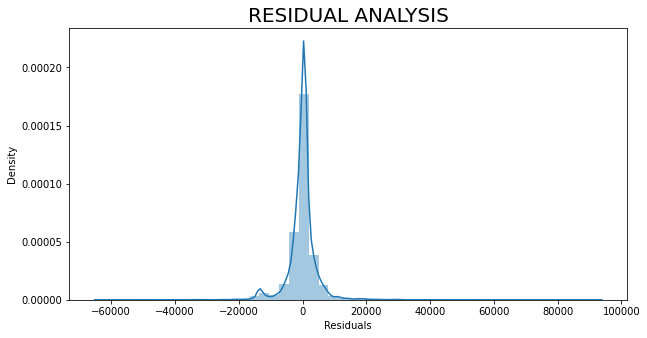

In [50]:
# plot of residuals
plt.figure(figsize=(10,5))
y_train_pred = salary_reg.predict(x_train)
res = y_train- y_train_pred
sns.distplot(res)
plt.xlabel('Residuals')
plt.title("RESIDUAL ANALYSIS", fontsize = 20)
plt.show()

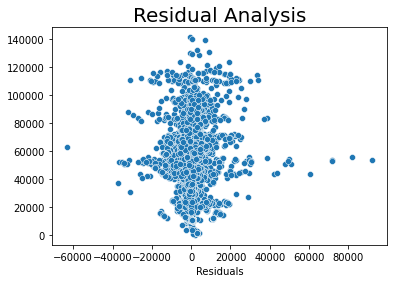

In [51]:
# scatterplot 
sns.scatterplot(x = res, y = y_train_pred)
plt.xlabel('Residuals')
plt.title('Residual Analysis', fontsize = 20)
plt.show()

In [52]:
# the model is generated and can be used for salary predictions let's check the coefficients and intercept
print('coef are', salary_reg.coef_)
print('intercept is ', salary_reg.intercept_)

coef are [22209.2394516   2851.90145914 -1782.8465773    -49.19796316
  -129.24057281 -2044.34648201]
intercept is  39396.37679494932


In [53]:
# let's finally create a model equation and store it in a string
model = str(salary_reg.intercept_)
for i in range(len(salary_reg.coef_)):
    model = model + " + " + str(salary_reg.coef_[i])+ " * "+ str(x_train.columns[i])
print(model)

39396.37679494932 + 22209.239451604026 * JobTitle + 2851.901459141135 * AgencyID + -1782.8465772993004 * Agency + -49.19796316341974 * HireDay + -129.2405728133304 * HireMonth + -2044.3464820053757 * HireYear
